In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn

In [3]:
dfOutcomes = pd.read_csv("sc1_Phase1_GE_Outcome.tsv",sep="\t")
dfOutcomes['SURVIVAL_STATUS'].value_counts()
dfOutcomes[dfOutcomes['SURVIVAL_STATUS'] == 1].sample(n=51)
dfOutcomes.head()

,PATIENTID,SURVIVAL_STATUS
0,patient_290,1
1,patient_394,1
2,patient_81,1
3,patient_307,1
4,patient_14,1


In [4]:
dfPhenotypes = pd.read_csv("sc1_Phase1_GE_Phenotype.tsv",sep="\t")
dfPhenotypes = dfPhenotypes.replace(r'^\s*$', np.nan, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^IV', 4, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^III', 3, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^II', 2, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^I', 1, regex=True)
dfPhenotypes['WHO_GRADING'].replace(np.nan, 0, regex=True,inplace=True)
dfPhenotypes.head()

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE
0,patient_290,NaN,NaN,2.0,ASTROCYTOMA
1,patient_394,NaN,NaN,0.0,GBM
2,patient_81,NaN,NaN,3.0,ASTROCYTOMA
3,patient_307,NaN,NaN,0.0,UNCLASSIFIED
4,patient_14,NaN,NaN,0.0,GBM


In [5]:
dfFeatures = pd.read_csv("sc1_Phase1_GE_FeatureMatrix.tsv",sep="\t")
dfFeatures.head()

,PATIENTID,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,patient_290,6.557793,6.453623,5.302909,12.530607,6.082401,5.667769,6.764585,6.094459,6.240895,...,7.338461,8.616562,6.587933,6.034539,7.525232,5.847143,9.426022,10.027414,8.438376,8.853557
1,patient_394,6.323015,6.305724,5.552097,13.000489,6.263721,5.347906,6.723860,6.143284,6.256355,...,8.138918,9.463643,6.233711,6.174691,8.169813,5.988549,9.988564,11.577409,8.672737,9.205295
2,patient_81,6.669421,6.414214,5.478774,12.545510,5.940785,5.639510,6.752736,6.001829,6.148274,...,7.754430,9.229166,6.288666,5.957426,8.148327,6.190679,9.531540,11.180062,8.484453,8.856021
3,patient_307,6.502573,6.508156,5.648495,12.407083,6.414991,5.493800,6.912802,6.072980,6.318908,...,6.582457,8.851282,6.672033,6.194203,7.576931,6.422759,9.057685,10.062035,8.508903,7.742661
4,patient_14,6.624505,6.911232,5.614099,10.777103,6.236386,5.512900,7.178968,6.088447,6.091908,...,7.176397,7.618780,6.086676,6.096177,7.251395,6.090243,10.298209,9.443150,8.204315,8.606522


In [6]:
dfs = pd.merge(dfPhenotypes,dfOutcomes,how="inner",on="PATIENTID")
dfMerged = pd.merge(dfs,dfFeatures,how="inner",on="PATIENTID")
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Columns: 19341 entries, PATIENTID to ZZZ3
dtypes: float64(19336), int64(1), object(4)
memory usage: 55.6+ MB


In [54]:
#dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'UNKNOWN']
#dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'UNCLASSIFIED']
#dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'MIXED']
#dfMerged = dfMerged[dfMerged.WHO_GRADING != 0]
dfCount = dfMerged[dfMerged['SURVIVAL_STATUS']==0]
dfCount

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS,A1BG,A1BG.AS1,A1CF,A2M,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
37,patient_654,MALE,WHITE,4.0,GBM,0,6.888966,6.919759,5.382967,12.801268,...,6.854620,7.365366,6.048575,5.966297,7.258182,6.013034,9.367449,9.538811,8.286802,8.667675
43,patient_375,FEMALE,WHITE,4.0,GBM,0,6.791863,6.872367,5.427558,12.467948,...,6.598569,8.258718,6.021195,5.960291,7.322752,6.385392,9.354172,9.746052,8.382402,8.677187
47,patient_113,FEMALE,WHITE,2.0,ASTROCYTOMA,0,7.311807,7.044221,5.411064,13.161513,...,7.288878,8.235849,6.376180,6.073544,7.275325,5.967357,9.289735,10.121427,8.246705,8.874775
51,patient_468,FEMALE,WHITE,4.0,GBM,0,6.743090,6.828674,5.518644,12.683945,...,7.271699,7.938821,5.977331,5.937261,7.213713,6.109388,9.676957,10.017874,8.236059,8.216178
53,patient_412,FEMALE,WHITE,3.0,ASTROCYTOMA,0,6.421630,6.710976,5.302505,12.414948,...,7.111185,8.416918,5.825822,6.168967,7.505441,6.063249,9.699276,9.736769,8.361964,8.722557
59,patient_296,FEMALE,WHITE,4.0,GBM,0,6.571250,6.542570,5.524973,12.667189,...,7.827935,9.691536,6.215575,5.806869,7.693140,6.236193,9.329137,11.708178,8.321027,8.538186
77,patient_344,MALE,WHITE,4.0,GBM,0,6.490398,6.706609,5.455154,13.086541,...,7.921479,9.068930,6.414621,6.109018,7.351077,6.307975,9.156177,10.792436,8.490162,8.571330
87,patient_576,MALE,WHITE,4.0,GBM,0,6.522912,6.596993,5.387538,13.187904,...,7.143275,7.992745,6.093028,5.862213,7.376004,5.956503,9.422766,10.379931,8.326512,8.843987
95,patient_80,MALE,WHITE,4.0,GBM,0,6.787225,6.574610,5.412250,12.082633,...,7.779947,9.229081,6.401454,6.139046,7.474386,6.013661,9.542292,10.803533,8.320706,8.837854
97,patient_177,FEMALE,WHITE,4.0,GBM,0,7.018796,6.714542,5.448425,13.213244,...,7.888715,9.188353,6.326709,6.010817,7.384990,6.140743,9.283825,11.563059,8.427064,8.572492


In [10]:
dfMergedDownSampledOutcomes=pd.concat([
        dfMerged[dfMerged['SURVIVAL_STATUS'] == 1].sample(n=len(dfCount.index)),
        dfMerged[dfMerged['SURVIVAL_STATUS'] == 0].sample(n=len(dfCount.index))
])
dfMergedDownSampledOutcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 339 to 220
Columns: 19341 entries, PATIENTID to ZZZ3
dtypes: float64(19336), int64(1), object(4)
memory usage: 10.0+ MB


In [11]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2, SelectKBest, f_regression, RFE, mutual_info_classif
X = dfMergedDownSampledOutcomes
X = X.drop(columns=['PATIENTID','SEX','WHO_GRADING','RACE','CANCER_TYPE','SURVIVAL_STATUS'])
y = dfMergedDownSampledOutcomes.iloc[:,4]
y.value_counts()

GBM                  28
ASTROCYTOMA          25
OLIGODENDROGLIOMA    15
Name: CANCER_TYPE, dtype: int64

In [12]:
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Genes','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print 10 best features

           Genes      Score
2940      CHI3L1  20.569301
7243      IGFBP2  16.109177
13638       PTX3  14.219042
4800        EMP3  13.135755
356          ADM  12.052402
9952         LTF  11.931252
10391      MEOX2  11.846066
742        ANXA1  11.502992
16888      TIMP1  10.774750
10312       MCUB   9.287563
16351      SUSD5   8.740437
14592     S100A8   8.628418
2941      CHI3L2   8.331625
3311      COL3A1   8.209169
13067      POSTN   8.032043
10704      MOXD1   7.960872
6327       GPR17   7.762261
5967        GBP1   7.626940
15803       SOD2   7.559826
12468       PDPN   7.402497
13986       RBP1   7.349009
5449       FCGBP   7.272970
3657      CTHRC1   7.271089
11543       NNMT   7.174450
8686   LINC01088   7.071826
1855         C1R   7.062771
6306       GPNMB   6.903625
18210      VEGFA   6.733700
3299      COL1A1   6.588441
8350      LGALS3   6.571258
...          ...        ...
746        ANXA2   4.712120
8230       LAMB1   4.636642
6010       GDF15   4.634134
15199    SLC14A1   4

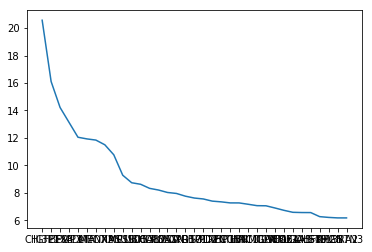

In [68]:
import matplotlib.pyplot as plt
Vals= featureScores.nlargest(35,'Score')  #print 10 best features
xVal = Vals['Genes']
yVal = Vals['Score']
plt.plot(xVal,yVal)  #print 10 best features
plt.show()

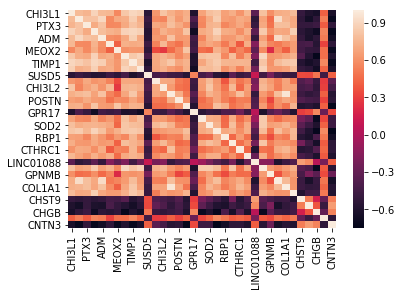

In [69]:
selCols = pd.Series(['SURVIVAL_STATUS'])
dfSelectedY = dfMergedDownSampledOutcomes.loc[:,selCols]
#xValDup = pd.Series(['CHI3L1','PTX3','COL3A1','IGFBP2','ADM','LTF','COL1A1'])
dfSelectedX = dfMergedDownSampledOutcomes.loc[:,xVal[0:]]
#print(dfSelectedX)

import seaborn as sns
corrMap = dfSelectedX.corr()
sns.heatmap(corrMap)

In [70]:
from sklearn import svm
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

clf = svm.SVC(kernel='rbf',gamma='auto',decision_function_shape='ovr')
cv = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)

totScore=0
i=0
for train_index,test_index in cv.split(dfSelectedX,dfSelectedY):
    x_train, x_test = dfSelectedX.iloc[train_index], dfSelectedX.iloc[test_index]
    y_train, y_test = dfSelectedY.iloc[train_index], dfSelectedY.iloc[test_index]
    clf.fit(dfSelectedX, dfSelectedY.values.ravel())
    predictions = clf.predict(x_test)

    predY = pd.DataFrame(predictions,index= y_test.index, columns=['Predicted_type'])
    #print(predY)

    finalPred = pd.concat([y_test,predY],axis=1)
    #print(finalPred)
    #print(multilabel_confusion_matrix(y_test, predictions))
    print("\n-----------------------------")
    tn,fp,fn,tp = confusion_matrix(y_test, predictions).ravel()
    print(" tn\tfp\tfn\t tp\n",tn,"\t",fp,"\t",fn,"\t",tp)
    score = clf.score(x_test, y_test)
    print("\naccuracy:",score)
    
    print("-----------------------------\n")
    
    totScore = totScore + score
    i=i+1
    
print("average accuracy:", totScore/i)



-----------------------------
 tn	fp	fn	 tp
 9 	 0 	 1 	 8

accuracy: 0.9444444444444444
-----------------------------


-----------------------------
 tn	fp	fn	 tp
 9 	 0 	 0 	 9

accuracy: 1.0
-----------------------------


-----------------------------
 tn	fp	fn	 tp
 8 	 0 	 0 	 8

accuracy: 1.0
-----------------------------


-----------------------------
 tn	fp	fn	 tp
 8 	 0 	 1 	 7

accuracy: 0.9375
-----------------------------

average accuracy: 0.9704861111111112


In [71]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image  
import pydotplus

clfD = DecisionTreeClassifier(criterion="gini",random_state=0, max_depth=10)
cv = StratifiedKFold(n_splits=2, random_state=0, shuffle=True)

totScore=0.0
i=0

#print(dfSelectedX.head())
for train_index,test_index in cv.split(dfSelectedX,dfSelectedY):
    x_train, x_test = dfSelectedX.iloc[train_index], dfSelectedX.iloc[test_index]
    y_train, y_test = dfSelectedY.iloc[train_index], dfSelectedY.iloc[test_index]
    clfD.fit(dfSelectedX, dfSelectedY.values.ravel())
    predictions = clfD.predict(x_test)

    predY = pd.DataFrame(predictions,index= y_test.index, columns=['Predicted_type'])
    #print(predY)

    finalPred = pd.concat([y_test,predY],axis=1)
    #print(finalPred)
    #print(multilabel_confusion_matrix(y_test, predictions))
    print("\n-----------------------------")
    tn,fp,fn,tp = confusion_matrix(y_test, predictions).ravel()
    print(" tn\tfp\tfn\t tp\n",tn,"\t",fp,"\t",fn,"\t",tp)
    score = clfD.score(x_test, y_test)
    print("\naccuracy:",score)
    
    print("-----------------------------\n")
    score = clfD.score(x_test, y_test)
    #print(score)
    
    totScore = totScore + score
    i=i+1
    
print("average", totScore/i)




-----------------------------
 tn	fp	fn	 tp
 17 	 0 	 0 	 17

accuracy: 1.0
-----------------------------


-----------------------------
 tn	fp	fn	 tp
 17 	 0 	 0 	 17

accuracy: 1.0
-----------------------------

average 1.0


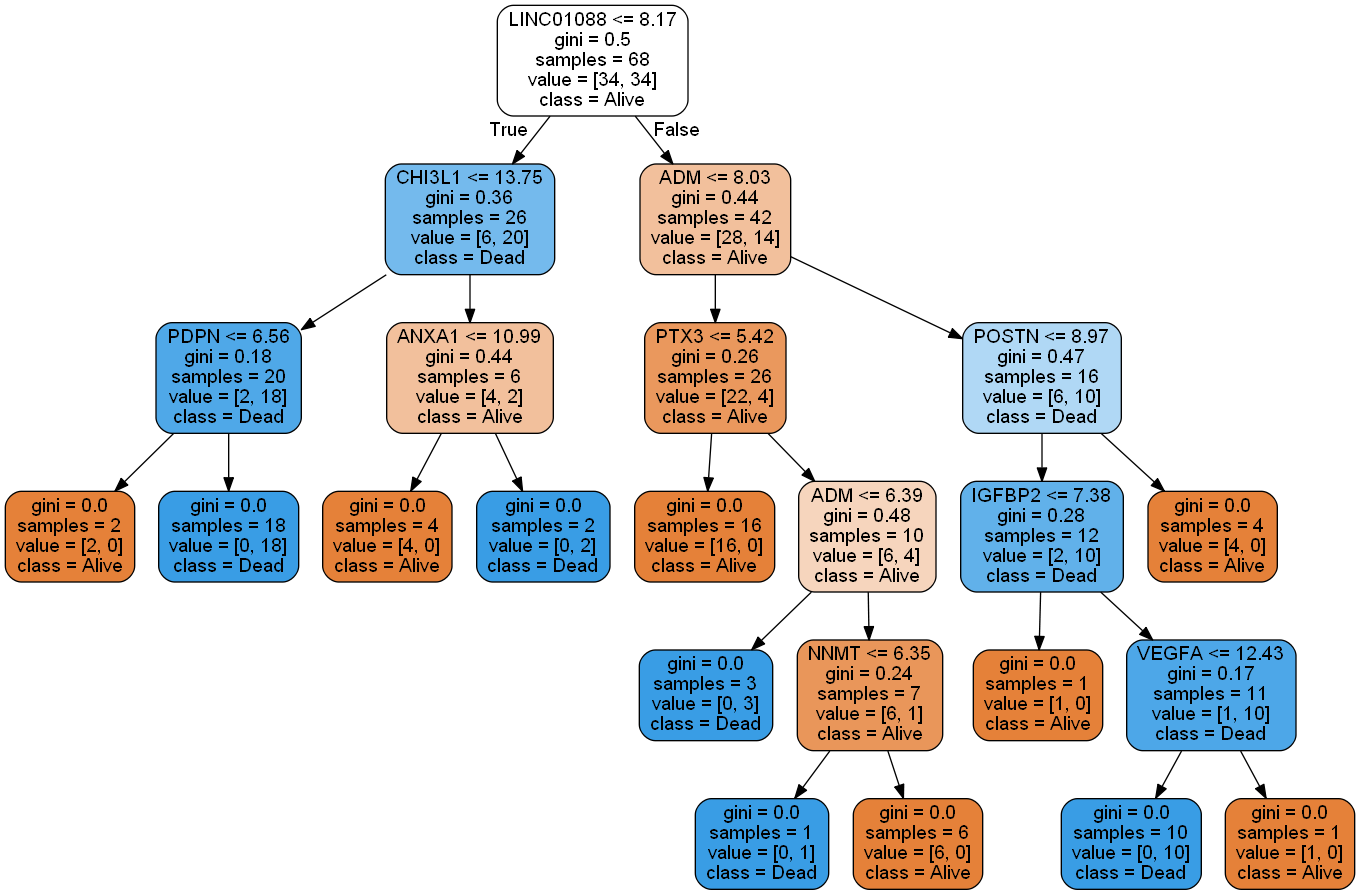

In [72]:
from sklearn.tree import export_graphviz
# Export as dot file
dot_data = export_graphviz(clfD, 
                out_file=None, 
                feature_names=dfSelectedX.columns,
                class_names=['Alive','Dead'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())